### Lab 07

Labs in general are for you to solve short programming challenges in class. In contrast, homework assignments will involve more challenging and lengthy problems.

Feel free to ask the TAs for help if there is anything you do not understand. The TAs will go through suggested solutions in the last 15 minutes of the lab - typically by solving them in a live demo. **Your midterm exams will be like this, so it is highly beneficial for you to attend these labs**.

The second lab is to gain basic familiarity with optimization. 

- You can import any Python library module you need
- Do this lab without using the web to search for solutions

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

**1**. 

- Write a function to find where f(x) crosses zero using a bisection algorithm. The bisection algorithm works in the following way - given the left and right boundary, it checks if the crossing is between left and mid-point, or between the right and mid-point. If the former, the mid-point is set as the new right boundary and so on. In other words the interval containing the crossing is halved at each step. Stop when the length of the interval is less than 1e-6, and return the left and right boundaries at that point.
    - The function should have the signature `bisect(f, left=0, right=1, tol=1e-6)`
    - Use `bisect` to find the left and right intervals containing a zero (root) of the function $x^3 + 4x^2 - 1$ between 0 and 1.
    - <font color=red>Hint</font>: If the crossing is between left and right, the function evaluated at left and right must have opposite signs. (20 points)

- Plot the function together with a horizontal line for $y=0$ and a red circle at the root whose coordinates are (`left`, 0). The x-limits of the plot should be 0 and 1.

In [2]:
def bisect(f, left=0, right=1, tol=1e-6):
    """Docstring"""
    
    if f(left) * f(right) > 0:
        return None
    
    mid = (left + right)/2
    err = abs(right - left)
    
    i = 0
    
    while (err > tol) and (i < 1000):
        i += 1
        
        if f(mid) == 0:
            return (mid, mid)
        
        if f(left) * f(mid) < 0:
            right = mid
        else:
            left = mid
        
        mid = (left + right)/2
        err = abs(right - left)
        
    return (left, right)

In [3]:
f = lambda x: x**3 + 4*x**2 -1

In [4]:
left, right = bisect(f)
left, right

(0.47283363342285156, 0.47283458709716797)

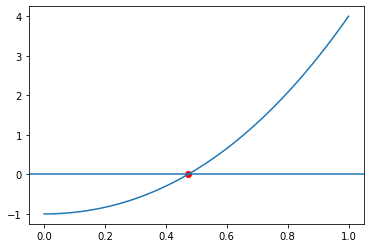

In [5]:
xp = np.linspace(0, 1, 100)
plt.plot(xp, f(xp))
plt.axhline(0)
plt.scatter([left], [0], c='red')
pass

**2**. 

Implement a Python function to find the minimum using the Newton-Raphson method. Use it to find a minimum of $x^3 + 4x^2 -3 = x$ given the initial location $x_0 = -1$. Do not use any library methods apart from those in `np` - the idea is to develop the algorithm using only basic Python language constructs.

In [6]:
f = lambda x: x**3 + 4*x**2 - 3
f1 = lambda x: 3*x**2 + 8*x
f2 = lambda x: 6*x + 8

In [7]:
def newton(f, f1, f2, x0, tol=1e-6, max_iter=10):
    """Newton-Raphson minimization via root of function derivative."""
    
    x = x0
    for i in range(max_iter):
        fold = f(x)
        x = x - f1(x)/f2(x) 
        fnew = f(x)
        if np.abs(fnew - fold) < tol:
            return x
    return x

In [8]:
x = newton(f, f1, f2, -1)

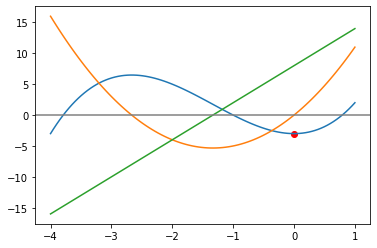

In [9]:
xp = np.linspace(-4, 1, 100)
plt.plot(xp, f(xp))
plt.plot(xp, f1(xp))
plt.plot(xp, f2(xp))
plt.axhline(0, c='gray')
plt.scatter([x], [f(x)], c='red')
pass

**3**. 

We observe some data points $(x_i, y_i)$, and believe that an appropriate model for the data is that

$$
f(x) = ax^2 + bx^3 + c\sin{x}
$$

with some added noise. Find optimal values of the parameters $\beta = (a, b, c)$ that minimize $\Vert y - f(x) \Vert^2$ using gradient descent with RMSprop (no bias correction) and starting with an initial value of $\beta = \begin{bmatrix}1 & 1 & 1\end{bmatrix}$. Use a learning rate of 0.01 and 10,000 iterations. This should take a few seconds to complete. (15 points)

Plot the data and fitted curve using `matplotlib`. (5 points)

Data
```
x = array([ 3.4027718 ,  4.29209002,  5.88176277,  6.3465969 ,  7.21397852,
        8.26972154, 10.27244608, 10.44703778, 10.79203455, 14.71146298])
y = array([ 25.54026428,  29.4558919 ,  58.50315846,  70.24957254,
        90.55155435, 100.56372833,  91.83189927,  90.41536733,
        90.43103028,  23.0719842 ])
```

In [10]:
x = np.array([ 3.4027718 ,  4.29209002,  5.88176277,  6.3465969 ,  7.21397852,
        8.26972154, 10.27244608, 10.44703778, 10.79203455, 14.71146298])
y = np.array([ 25.54026428,  29.4558919 ,  58.50315846,  70.24957254,
        90.55155435, 100.56372833,  91.83189927,  90.41536733,
        90.43103028,  23.0719842 ])

In [11]:
def f(beta, x):
    """Model function."""
    
    return beta[0]*x**2 + beta[1]*x**3 + beta[2]*np.sin(x)

In [12]:
def res(beta, x, y):
    """Resdiual funciton."""
    return f(beta, x) - y

In [13]:
def gd(beta, x, y, f, grad, alpha=0.01):
    """Gradient descent."""
    
    v = 0
    for i in range(10000):
        v = 0.9 * v + 0.1 * grad(beta, x, y)**2 
        beta = beta - (alpha * grad(beta, x, y))/(np.sqrt(v) + 1e-8)
    return beta

In [14]:
def grad1(beta, x, y):
    """Gradient of function."""
    
    return np.array([
        np.sum(x**2 * res(beta, x, y)),
        np.sum(x**3 * res(beta, x, y)),
        np.sum(np.sin(x) * res(beta, x, y))
    ])

In [15]:
beta = gd(np.array([1,1,1]), x, y, f, grad1)
beta

array([ 2.98759014, -0.20383227, 10.19524689])

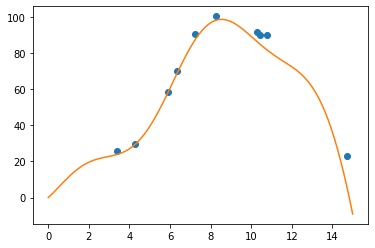

In [16]:
plt.plot(x, y, 'o')
xp = np.linspace(0, 15, 100)
plt.plot(xp, f(beta, xp))
pass

**Alternative gradient function**

In [17]:
def grad2(beta, X, y):
    """Gradient of function."""
    
    return X.T @ X @ beta - X.T @ y

In [18]:
X = np.c_[x**2, x**3, np.sin(x)]

beta = gd(np.array([1,1,1]), X, y, f, grad2)
beta

array([ 2.99759014, -0.19383227, 10.20524689])

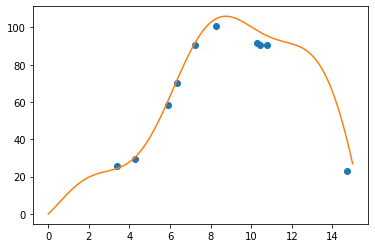

In [19]:
plt.plot(x, y, 'o')
xp = np.linspace(0, 15, 100)
plt.plot(xp, f(beta, xp))
pass

**4**. 

Given the set of vectors

```
v1 = np.array([1,2,3])
v2 = np.array([2,4,7])
v3 = np.array([1,0,1])
```

1. Calculate the pairwise Euclidean distance matrix  (5 points)
2. Find an orthogonal basis for the space spanned by the vectors $v_1, v_2, v_3$ without using any functions from `numpy.linag` or `scipy.linalg` (5 points)
3. Use Gram-Schmidt decomposition to  find an orthogonal basis for the space spanned by the vectors $v_1, v_2, v_3$ where one of the basis vectors must be in the direction of $v_3$. (10 points)

In [20]:
v1 = np.array([1,2,3])
v2 = np.array([2,4,7])
v3 = np.array([1,0,1])

def dist(u, v):
    w = u - v
    return np.sqrt(np.sum(w**2))

D = np.array([[dist(u1, u2) for u1 in [v1, v2, v3]] for u2 in [v1, v2, v3]])
D

array([[0.        , 4.58257569, 2.82842712],
       [4.58257569, 0.        , 7.28010989],
       [2.82842712, 7.28010989, 0.        ]])

Check rank then use standard basis

In [21]:
np.linalg.matrix_rank(D)

3

In [22]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [23]:
def proj(u, v):
    """Find projection of u on v."""
    
    return (u.T @ v)/(v.T @ v) * v

In [24]:
u1 = v3
u2 = v1 - proj(v1, u1)
u3 = v2 - proj(v2, u1) - proj(v2, u2)

In [25]:
B = np.c_[
    u1 / np.linalg.norm(u1),
    u2 / np.linalg.norm(u2), 
    u3 / np.linalg.norm(u3)
]

In [26]:
B @ B.T

array([[ 1.00000000e+00, -3.33066907e-16, -3.88578059e-16],
       [-3.33066907e-16,  1.00000000e+00,  3.33066907e-16],
       [-3.88578059e-16,  3.33066907e-16,  1.00000000e+00]])

**5**.

A milkmaid is at point A and needs to get to point B. However, she also needs to fill a pail of water from the river en route from A to B. The equation of the river's path is shown in the figure below. What is the minimum distance she has to travel to do this?

1. Solve using `scipy.optimize` and constrained minimization (15 points)
2. Plot the solution (5 point)

![Milkmaid problem](../data/milkmaid.png)

Hint: There is a local and a global optimum for this problem, so try different initial conditions.

In [27]:
import scipy.optimize as opt
import scipy.linalg as la

In [28]:
def f(x, A, B):
    """Distance between two points"""
    
    return la.norm(x-A) + la.norm(x-B)

def g(x):
    """Equation of stream."""

    return 10/(1+x)

A = np.array([2,8])
B = np.array([8,4])
cons = {'type': 'eq', 'fun': lambda x: x[1] - g(x[0])}

ms = [opt.minimize(f, [x0, g(x0)], args=(A, B), constraints=cons) for x0 in range(0, 11)]
m = min(ms, key=lambda res: res.fun)

print("Shortest distance", m.fun)

Shortest distance 9.963398299572699


In [29]:
%matplotlib inline

import matplotlib.pyplot as plt

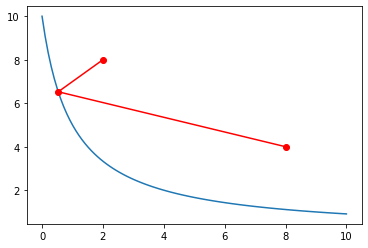

In [30]:
xp = np.linspace(0, 10, 100)
plt.plot(xp, g(xp))
plt.plot([A[0], m.x[0], B[0]], [A[1], m.x[1], B[1]], '-o', c='red')
pass